# План работы

1. Изучение файла
2. Разделение данных на выборки
3. Исследование моделей
4. Проверка модели на тестовой выборке
5. Выводы

## Изучение файла

<div style="border:solid blue 2px; padding: 20px">

Импортируем библиотеки
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# чтение файла с данными и сохранение в data_users
# метод try-except поможет загрузить данные локально или глобально
try:
    df = pd.read_csv('C:/Users/users_behavior.csv')  # Локальный путь
except:
    df = pd.read_csv('/datasets/users_behavior.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [3]:
# получение первых 5 строк таблицы
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [4]:
# получение общей информации о данных в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание данных
    
    
</div> 

In [5]:
# описание данных
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<div style="border:solid blue 2px; padding: 20px">
    
 
Сохраним в переменную `random_state` значение параметра, чтобы результаты получились одинаковыми
    
    
</div> 

In [6]:
# сохранение параметра
random_state = 1234

<div style="border:solid blue 2px; padding: 20px">

    
Рассмотрим зависимость между числовыми факторами
    

количества звонков `сalls` и длительности звонков в минутах `minutes`
 
    
Получим таблицу с коэффициентами корреляции методом `corr()`
    
    
Потроим диаграммы рассеяния `.plotting.scatter_matrix`
    


</div> 

In [7]:
# вывод строк для определения зависимости
df_correlation = df.loc[:,['calls','minutes']]
df_correlation.head()

,calls,minutes
0,40.0,311.90
1,85.0,516.75
2,77.0,467.66
3,106.0,745.53
4,66.0,418.74


In [8]:
# вывод матрицы корреляции
df_correlation.corr()

,calls,minutes
calls,1.000000,0.982083
minutes,0.982083,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8ac024910>,
      dtype=object)

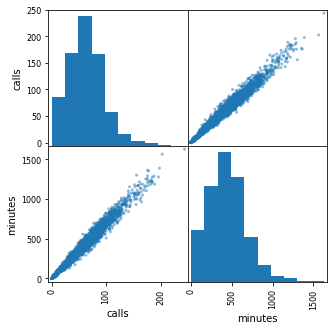

In [9]:
# построение диаграмм рассеяния
pd.plotting.scatter_matrix(df_correlation, figsize=(5, 5))

<div style="border:solid blue 2px; padding: 20px">

    
Наличие сильной корреляции `0.98` между количеством звонков `сalls` и длительностью `minutes`
    
Минуты и зывонки - мультиколлинеарны
    
В модель можно включить один из факторов
    


</div> 

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
**Оценка полученных данных**

Наблюдения, представленные в таблице описываются категориальными и количественными значениями.
    
Данные можно исследовать для дальнейшего анализа.
    
    
**Таблица `users_behavior` (информация о пользователях)**:
    
`сalls` — количество звонков
    
`minutes` — суммарная длительность звонков в минутах
    
`messages` — количество sms-сообщений
    
`mb_used` — израсходованный интернет-трафик в Мб  
    
`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)
    

**Категориальные** - `is_ultra` - целевой признак
    
**Количественные** - `сalls` , `minutes` , `messages` , `mb_used`
    
</div>

## Разделение данных на выборки

<div style="border:solid blue 2px; padding: 20px">
    
 
`train_test_split()` разделим исходные данные на обучающую, валидационную и тестовую выборки
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
`df` разделим на обучающую `df_train` выборку `3-и части` и `df_part` оставшиеся `2-е части`
    
    
</div> 

In [10]:
# получение обучающей выборки
df_train, df_part = train_test_split(df, test_size=0.40, random_state=random_state)
print('Объектов обучающей выборки', df_train.shape[0])

Объектов обучающей выборки 1928


<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки обучающей выборки сохраним в отдельных переменных 
    
    
- `features_train`
    
    
- `target_train` - целевой признак
    
    
</div> 

In [11]:
# сохранение признаков обучающей выбороки в отдельных переменных
features_train = df_train.drop(columns=['is_ultra'])
target_train = df_train['is_ultra']

<div style="border:solid blue 2px; padding: 20px">
    
 
`df_part` разделим на валидационную `df_valid` выборку `1 часть` и `df_test` тестовую  `1 часть`
    
    
</div> 

In [12]:
# получение валидационной и тестовой выборки
df_valid, df_test = train_test_split(df_part, test_size=0.50, random_state=random_state)
print('Объектов валидационной выборки', df_valid.shape[0])
print('Объектов тестовой выборки', df_test.shape[0])

Объектов валидационной выборки 643
Объектов тестовой выборки 643


<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки валидационной выборки сохраним в отдельных переменных 
    
    
- `features_valid`
    
    
- `target_valid` - целевой признак
    
    
</div> 

In [13]:
# сохранение признаков валидационной выбороки в отдельных переменных
features_valid = df_valid.drop(columns=['is_ultra'])
target_valid = df_valid['is_ultra']

<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки тестовой выборки сохраним в отдельных переменных 
    
    
- `features_test`
    
    
- `target_test` - целевой признак
    
    
</div> 

In [14]:
# сохранение признаков тестовой выбороки в отдельных переменных
features_test = df_test.drop(columns=['is_ultra'])
target_test = df_test['is_ultra']

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Получили соотношение по выборкам `df_train : df_valid : df_test` соостветственно `3 : 1 : 1`
    
    
</div> 

## Исследование моделей

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — решающее дерево.
    
Перебирём циклом разные варианты глубины дерева `max_depth`.
    
    
</div> 

In [15]:
tree_model = None
best_depth = 0
best_accuracy = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=random_state, max_depth=depth) # инициализируем модель
    model.fit(features_train, target_train) # обучение модели
    predictions_valid = model.predict(features_valid) # получение предсказания модели на валидационной выборке
    accuracy = accuracy_score(target_valid, predictions_valid) # качество модели на валидационной выборке
    print('Глубина дерева', depth,'Оценка',accuracy)
    if accuracy > best_accuracy:
        tree_model = model
        best_depth = depth
        best_accuracy = accuracy

print('Лучшая глубина дерева', best_depth,'Лучшая оценка', best_accuracy)

Глубина дерева 1 Оценка 0.776049766718507
Глубина дерева 2 Оценка 0.8009331259720062
Глубина дерева 3 Оценка 0.8118195956454122
Глубина дерева 4 Оценка 0.8009331259720062
Глубина дерева 5 Оценка 0.8087091757387247
Глубина дерева 6 Оценка 0.8180404354587869
Глубина дерева 7 Оценка 0.8320373250388803
Глубина дерева 8 Оценка 0.8242612752721618
Глубина дерева 9 Оценка 0.8180404354587869
Лучшая глубина дерева 7 Лучшая оценка 0.8320373250388803


<div style="border:solid blue 2px; padding: 20px">
    
 
`accuracy` на модели решающее дерево составляет `0.8320` при глубине дерева `7`.
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — случайный лес.
    
Перебирём циклом разные варианты количества деревьев `n_estimators`.
    
    
</div> 

In [16]:
forest_model = None
best_est = 0
best_accuracy = 0
for est in range(1,20):
    model = RandomForestClassifier(random_state=random_state, n_estimators=est) # инициализируем модель
    model.fit(features_train, target_train) # обучение модели с заданным количеством деревьев
    predictions_valid = model.predict(features_valid) # получение предсказания модели на валидационной выборке
    accuracy = accuracy_score(target_valid, predictions_valid) # качество модели на валидационной выборке
    print('Количество деревьев', est,'Оценка',accuracy)
    if accuracy > best_accuracy:
        forest_model = model
        best_est = est
        best_accuracy = accuracy

print('Лучшее количество деревьев', best_est,'Лучшая оценка', best_accuracy)

Количество деревьев 1 Оценка 0.7418351477449455
Количество деревьев 2 Оценка 0.7636080870917574
Количество деревьев 3 Оценка 0.7729393468118196
Количество деревьев 4 Оценка 0.7962674961119751
Количество деревьев 5 Оценка 0.7900466562986003
Количество деревьев 6 Оценка 0.80248833592535
Количество деревьев 7 Оценка 0.7900466562986003
Количество деревьев 8 Оценка 0.8009331259720062
Количество деревьев 9 Оценка 0.7822706065318819
Количество деревьев 10 Оценка 0.80248833592535
Количество деревьев 11 Оценка 0.7900466562986003
Количество деревьев 12 Оценка 0.8055987558320373
Количество деревьев 13 Оценка 0.7900466562986003
Количество деревьев 14 Оценка 0.8040435458786936
Количество деревьев 15 Оценка 0.7962674961119751
Количество деревьев 16 Оценка 0.8055987558320373
Количество деревьев 17 Оценка 0.8087091757387247
Количество деревьев 18 Оценка 0.8118195956454122
Количество деревьев 19 Оценка 0.8087091757387247
Лучшее количество деревьев 18 Лучшая оценка 0.8118195956454122


<div style="border:solid blue 2px; padding: 20px">
    
 
`accuracy` на модели случайный лес составляет `0.8118` при количестве деревьев `18`.
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — логистическая регрессия.

    
    
</div> 

In [17]:
logistic_model = LogisticRegression(random_state=random_state) # инициализируем модель логистической регрессии
logistic_model.fit(features_train, target_train)  # обучение модели
result = logistic_model.score(features_valid, target_valid)
print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7216174183514774


<div style="border:solid blue 2px; padding: 20px">
    
 
Изменим другой гиперпараметр `solver`
    
    
</div> 

In [18]:
# просмотр модели
logistic_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1234, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# замена гиперпараметра solver
logistic_model = LogisticRegression(random_state=random_state, solver='lbfgs') # инициализируем модель логистической регрессии
logistic_model.fit(features_train, target_train)  # обучение модели
result = logistic_model.score(features_valid, target_valid)
print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263


<div style="border:solid blue 2px; padding: 20px">
    
 
Изменим другой гиперпараметр `С`
    
    
</div> 

In [20]:
# замена гиперпараметра С
logistic_model = None
best_C = 0.0
best_accuracy = 0

for float_c in [x/10 for x in range(1,21)]:
    model = LogisticRegression(random_state=random_state, C=float_c)
    model.fit(features_train, target_train)
    valid_predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    print('C=', float_c,'Оценка',accuracy)
    if accuracy > best_accuracy:
        logistic_model = model
        best_C= float_c
        best_accuracy = accuracy

print('Лучший C', best_C,'Лучшая оценка', best_accuracy)

C= 0.1 Оценка 0.8087091757387247
C= 0.2 Оценка 0.8087091757387247
C= 0.3 Оценка 0.8087091757387247
C= 0.4 Оценка 0.8087091757387247
C= 0.5 Оценка 0.8087091757387247
C= 0.6 Оценка 0.8087091757387247
C= 0.7 Оценка 0.8087091757387247
C= 0.8 Оценка 0.8087091757387247
C= 0.9 Оценка 0.8087091757387247
C= 1.0 Оценка 0.8087091757387247
C= 1.1 Оценка 0.8087091757387247
C= 1.2 Оценка 0.8087091757387247
C= 1.3 Оценка 0.8087091757387247
C= 1.4 Оценка 0.8087091757387247
C= 1.5 Оценка 0.8087091757387247
C= 1.6 Оценка 0.8087091757387247
C= 1.7 Оценка 0.8087091757387247
C= 1.8 Оценка 0.8087091757387247
C= 1.9 Оценка 0.8087091757387247
C= 2.0 Оценка 0.8087091757387247
Лучший C 0.1 Лучшая оценка 0.8087091757387247


<div style="border:solid blue 2px; padding: 20px">
    
 
`accuracy` модели логистической регрессии на валидационной выборке составляет `0.8087`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Лучшее качество модели `0.8320` на валидационной выборке получено при применении алгоритма 
    
решающее дерево с гиперпараметром `max_depth=7`
    
</div> 

## Проверка модели на тестовой выборке

<div style="border:solid blue 2px; padding: 20px">
    
Проверим качество лучшей модели на тестовой выборке
    
</div> 

In [21]:
tree_model = DecisionTreeClassifier(random_state=random_state, max_depth=7)
tree_model.fit(features_train, target_train) # обучение модели
predictions_test = tree_model.predict(features_test)
accuracy_tree_model = accuracy_score(target_test, predictions_test)
print('Оценка модели решающего леса на тестовой выборке',accuracy_tree_model)

Оценка модели решающего леса на тестовой выборке 0.7916018662519441


<div style="border:solid blue 2px; padding: 20px">

### Вывод


    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Можно рекомендовать модель решающего леса для построения системы анализа клиентов
    
</div> 